In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
deldata = pd.read_csv("C:/Users/Winner/Desktop/delivery_time.csv")
deldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sorting Time   21 non-null     int64  
 1   Delivery Time  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
train, test = train_test_split(deldata,test_size=0.35)
print(train.shape)
print(test.shape)

(13, 2)
(8, 2)


In [4]:
x = deldata['Sorting Time'].values.reshape(-1,1)
y = deldata['Delivery Time'].values.reshape(-1,1)

In [5]:
DTmodel = LinearRegression()
train_DTmodel = DTmodel.fit(x,y)
print(DTmodel)
print('DT Model Training is Done')

LinearRegression()
DT Model Training is Done


In [6]:
print(DTmodel.coef_)  
print(DTmodel.intercept_)

[[1.6490199]]
[6.58273397]


In [7]:
x = 6
y = round((DTmodel.coef_[0][0])*x + (DTmodel.intercept_[0]))
print(("The delivery time is {} minutes when the sorting time is {} minutes.".format(y,x)))

The delivery time is 16 minutes when the sorting time is 6 minutes.


In [8]:
x = 10
y = round((DTmodel.coef_[0][0])*x + (DTmodel.intercept_[0]))
print(("The delivery time is {} minutes when the sorting time is {} minutes.".format(y,x)))

The delivery time is 23 minutes when the sorting time is 10 minutes.


In [9]:
x = 21
y = round((DTmodel.coef_[0][0])*x + (DTmodel.intercept_[0]))
print(("The delivery time is {} minutes when the sorting time is {} minutes.".format(y,x)))

The delivery time is 41 minutes when the sorting time is 21 minutes.


In [10]:
x_test = test['Sorting Time'].values.reshape(-1,1)
x_test

array([[10],
       [ 3],
       [ 9],
       [ 4],
       [ 7],
       [ 5],
       [ 4],
       [ 7]], dtype=int64)

In [11]:
test ['Pred_DT'] = train_DTmodel.predict(x_test)
test['Error'] = test['Delivery Time'] - test['Pred_DT']
test

,Sorting Time,Delivery Time,Pred_DT,Error
8,10,17.90,23.072933,-5.172933
7,3,9.50,11.529794,-2.029794
3,9,24.00,21.423913,2.576087
15,4,14.88,13.178814,1.701186
6,7,19.00,18.125873,0.874127
20,5,21.50,14.827833,6.672167
1,4,13.50,13.178814,0.321186
19,7,17.83,18.125873,-0.295873


<Axes: xlabel='Sorting Time', ylabel='Pred_DT'>

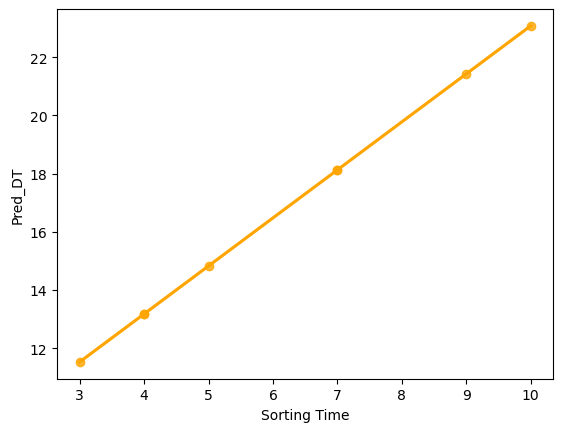

In [12]:
sns.regplot(x = 'Sorting Time', y = 'Pred_DT', data = test, color = 'orange')

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

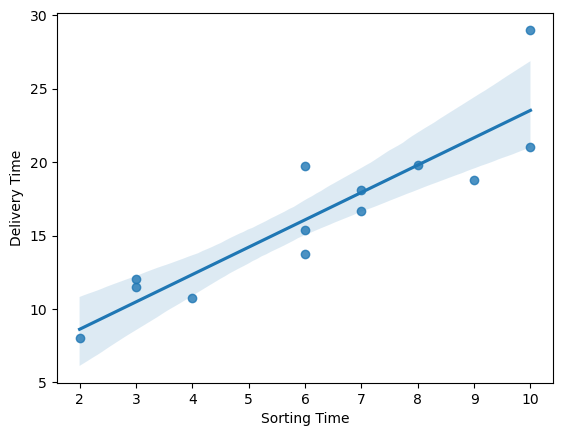

In [13]:
sns.regplot(x = 'Sorting Time', y = 'Delivery Time', data = train)